In [1]:
import pandas as pd
import numpy  as np
import matplotlib . pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
dataset_path = r"D:\job\tech\python\AIO_Exercise_Book_v2025.pdf\dataset\chapter 26\titanic_modified_dataset.csv"
df = pd.read_csv(dataset_path, index_col="PassengerId")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


fare : gia tau


In [10]:
dataset_arr = df.to_numpy().astype(np.float64)
X,y = dataset_arr[:,:-1],dataset_arr[:,-1]


In [11]:
intercept = np. ones (( X. shape [0] , 1))

X_b = np.concatenate((X,intercept),axis=1)

In [14]:
val_size = 0.2
test_size = 0.125   # 12.5% của train ~ 10% toàn bộ dataset
random_state = 2
is_shuffle = True

# Step 1: train + val
X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Step 2: train + test
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)


In [15]:
normalizer = StandardScaler ()
X_train [: , 1:] = normalizer . fit_transform ( X_train [: , 1:])
X_val [: , 1:] = normalizer . transform ( X_val [: , 1:])
X_test [: , 1:] = normalizer . transform ( X_test [: , 1:])


In [19]:
def sigmod (z):
    return 1 / (1 + np.exp(-z))

def predict (X,theta):
    return sigmod ( X @ theta )

def compute_loss(y_hat,y):
    y_hat = np.clip(y_hat,1e-7,1-1e-7)
    return (
    -y * np.log(y_hat)
    - (1 - y) * np.log(1 - y_hat)
).mean()


def compute_gradient (X, y, y_hat ):
    return np.dot(X.T,(y_hat - y)) /y.size

def update_theta (theta , gradient , lr) :
    return theta - lr * gradient
def compute_accuracy (X, y, theta ) :
    y_hat = predict (X, theta ) . round ()
    acc = ( y_hat == y) . mean ()
    return acc

In [20]:
lr = 0.01
epochs = 100
batch_size = 16

np. random . seed ( random_state )
theta = np. random . uniform (size = X_train . shape [1])


In [21]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []

    # ----- TRAIN LOOP -----
    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i : i + batch_size]
        y_i = y_train[i : i + batch_size]

        y_hat = predict(X_i, theta)

        # loss của batch
        loss = compute_loss(y_hat, y_i)
        train_batch_losses.append(loss)

        # gradient
        gradient = compute_gradient(X_i, y_i, y_hat)

        # update
        theta = update_theta(theta, gradient, lr)

    # Loss trung bình của epoch
    train_loss = np.mean(train_batch_losses)
    train_losses.append(train_loss)

    # ----- TÍNH ACCURACY & VAL CUỐI EPOCH -----
    train_acc = compute_accuracy(X_train, y_train, theta)
    train_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_accs.append(val_acc)

    print(f"\nEPOCH {epoch+1}: "
          f"Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, "
          f"Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")



EPOCH 1: Train Loss = 0.8448, Train Acc = 0.6645, Val Loss = 0.6976, Val Acc = 0.6480

EPOCH 2: Train Loss = 0.6949, Train Acc = 0.6918, Val Loss = 0.6470, Val Acc = 0.6536

EPOCH 3: Train Loss = 0.6264, Train Acc = 0.7014, Val Loss = 0.6284, Val Acc = 0.6536

EPOCH 4: Train Loss = 0.5890, Train Acc = 0.7143, Val Loss = 0.6191, Val Acc = 0.6760

EPOCH 5: Train Loss = 0.5649, Train Acc = 0.7175, Val Loss = 0.6123, Val Acc = 0.6927

EPOCH 6: Train Loss = 0.5472, Train Acc = 0.7271, Val Loss = 0.6062, Val Acc = 0.6983

EPOCH 7: Train Loss = 0.5332, Train Acc = 0.7319, Val Loss = 0.6002, Val Acc = 0.6927

EPOCH 8: Train Loss = 0.5216, Train Acc = 0.7496, Val Loss = 0.5946, Val Acc = 0.6872

EPOCH 9: Train Loss = 0.5117, Train Acc = 0.7624, Val Loss = 0.5892, Val Acc = 0.6927

EPOCH 10: Train Loss = 0.5032, Train Acc = 0.7640, Val Loss = 0.5843, Val Acc = 0.7039

EPOCH 11: Train Loss = 0.4958, Train Acc = 0.7705, Val Loss = 0.5797, Val Acc = 0.6983

EPOCH 12: Train Loss = 0.4893, Train Acc

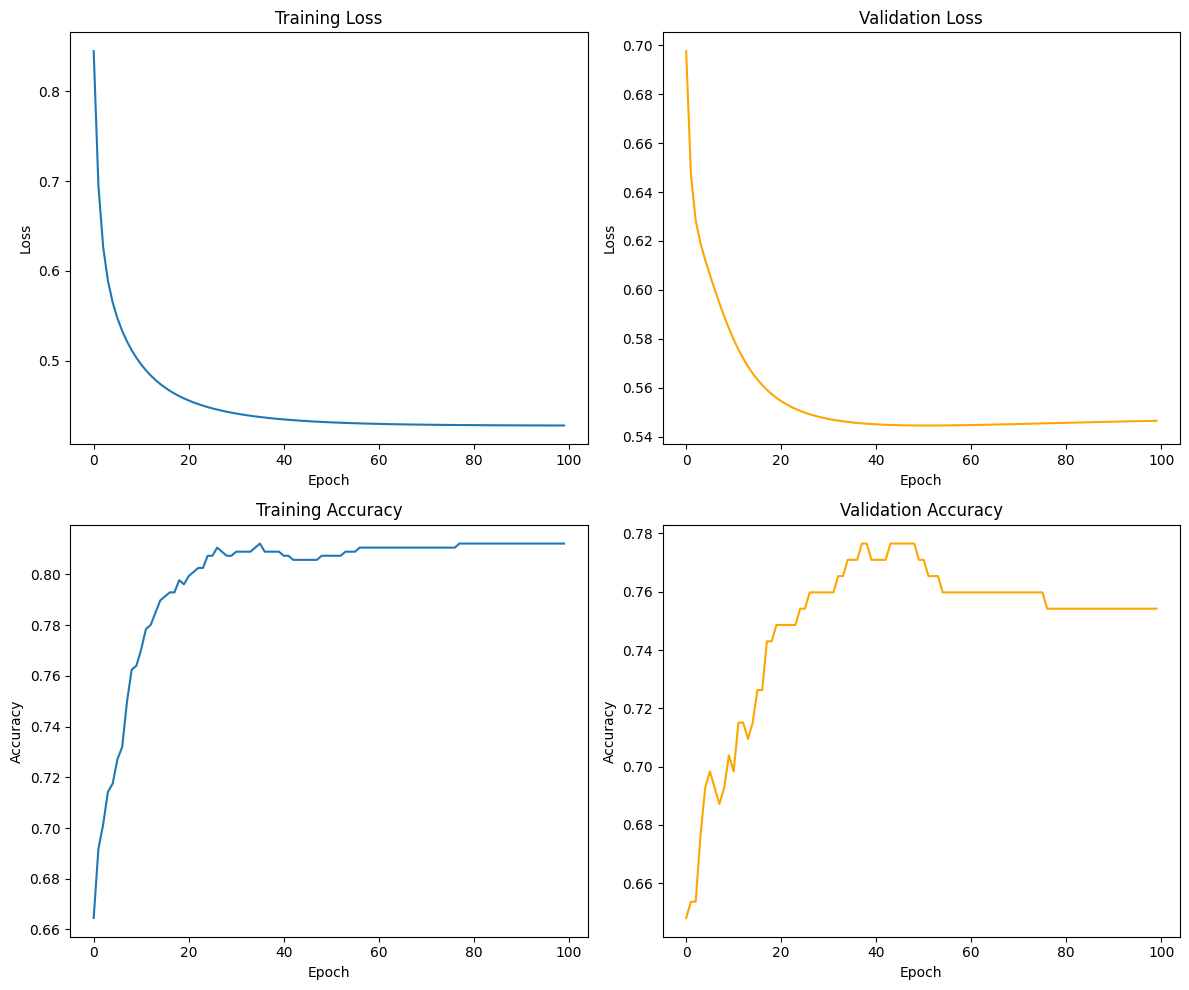

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# --- Training Loss ---
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# --- Validation Loss ---
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# --- Training Accuracy ---
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# --- Validation Accuracy ---
ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.tight_layout()
plt.show()


In [24]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy ( X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')


Evaluation on validation and test set :
Accuracy : 0.7541899441340782
Accuracy : 0.7752808988764045
